# <span style="color:#BC9EC1"> News Articles Share Prediction using Machine Learning </span>


# <span style="color:#BC9EC1"> Table of Contents </span>

* [1. Summary](#summary_1)
* [2. Ask Phase](#ask_phase_2)
    * [2.1 Business Task](#business_task_2_1)
* [3. Prepare Phase](#prepare_phase_3)
    * [3.1 Dataset used](#dataset_used_3_1)
    * [3.2 Accessibility and privacy of data](#accessibility_and_privacy_of_data_3_2)
    * [3.3 Information about our dataset](#information_about_our_dataset_3_3)
    * [3.4 Data organization and verification](#data_organization_and_verification_3_4)
    * [3.5 Data credibility and integrity](#data_credibility_and_integrity_3_5)
* [4. Process Phase](#process_phase_4)
    * [4.1 Installing packages and opening libraries](#installing_packages_and_opening_libraries_4_1)
    * [4.2 Importing and previewing our dataset](#importing_datasets_4_2)
    * [4.3 Cleaning and formatting](#cleaning_and_formatting_4_4)
    * [4.4 Performing EDA](#EDA)
         * [4.4.1 Texts Preprocessing and cleaning](#tpc441)
    * [4.5 Handling Categorical Data](#HCD_4.5)



---

# <span style="color:#BC9EC1">1. Summary</span>

In this analysis, we delve into predicting the number of shares for news articles using machine learning techniques. We explored various features and strategies to improve the model's predictive accuracy.

# <span style="color:#BC9EC1">2. Ask Phase</span>

**2.1 Business Task**

The primary business task was to develop an accurate predictive model for estimating the number of shares for news articles. This model aids in understanding what factors influence the shareability of articles, which is vital for content optimization and audience engagement.

# <span style="color:#BC9EC1">3. Prepare Phase </span>

**3.1 Dataset Used**

The dataset used for this analysis contains information about various news articles, including features such as the article's content, publication date, data channel, and more. This dataset is crucial for training and evaluating machine learning models.

**3.2 Accessibility and Privacy of Data**

The dataset is publicly accessible and does not contain any sensitive or private information, ensuring data privacy and compliance.

**3.3 Information about Our Dataset**

The dataset consists of several columns, including:
- `article_id`: A unique identifier for each article.
- `title`: The title of the article.
- `text`: The content of the article.
- `published_date`: The publication date of the article.
- `unique_tokens_rate`: A metric representing the uniqueness of tokens in the article.
- `num_hrefs`: The number of hyperlinks in the article.
- `num_imgs`: The number of images in the article.
- `num_videos`: The number of videos in the article.
- `average_token_length`: The average length of tokens in the article.
- `num_keywords`: The number of keywords in the article.
- `data_channel`: The data channel/category of the article.
- `min_avg_key`: The minimum average keyword score.
- `max_avg_key`: The maximum average keyword score.
- `avg_avg_key`: The average average keyword score.
- `href_avg_shares`: The average number of shares for articles with similar hyperlinks.
- `global_subjectivity`: A measure of subjectivity in the article.
- `global_sentiment_polarity`: A measure of sentiment polarity in the article.
- `global_rate_positive_words`: The rate of positive words in the article.
- `global_rate_negative_words`: The rate of negative words in the article.
- `title_subjectivity`: Subjectivity of the article's title.
- `title_sentiment_polarity`: Sentiment polarity of the article's title.
- `shares`: The target variable, representing the number of shares for the article.

**3.4 Data Organization and Verification**

The dataset was organized and cleaned to remove missing or erroneous data, ensuring data quality. Data verification steps were performed to maintain data integrity and accuracy.

**3.5 Data Credibility and Integrity**

The dataset used in this analysis is reputable and sourced from reliable channels, enhancing data credibility and integrity.


# <span style="color:#BC9EC1"> 4. Process Phase</span> <a name="process_phase_4"></a>
## 4.1 Installing packages and opening libraries<a name="installing_packages_and_opening_libraries_4_1"></a>

In [1]:
import numpy as np
import pandas as pd

import os
import math
import time
import re

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

# Below libraries are for text processing using NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances

## 4.2 Importing and previewing our dataset <a name="importing_datasets_4_2"></a>

In [2]:
df_news = pd.read_excel("data/news_share_data.xlsx")
df_news.head()

article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1            0.549618          4         1           0              4.636704   
2            0.577236          8         1           0              4.627451   
3            0.525896          4         1           0              5.083665   
4            0.588889          6         9           0              4.336022   

   num_keywords  ... max_avg_key  avg_avg_key  href_avg_shares  \
0             5  ...    4817.692     3370.415         1833.333   
1             7  ...    3581.094     2556.367         8500.000   
2             7  ...    3852.800     3018.167         2076.333   
3             9  ...    3581.094     1871.403         2200.000   
4             7  ...    8453.451     5155.323          805.000   

   global_subjectivity  global_sentiment_polarity  global_rate_positive_words  \
0             0.403762                   0.038762                    0.036735   
1             0.410707                   0.180934                    0.044944   
2             0.397545                   0.044864                    0.035294   
3             0.491578                   0.157620                    0.047809   
4             0.628535                   0.078497                    0.053763   

   global_rate_negative_words  title_subjectivity  title_sentiment_polarity  \
0                    0.024490                0.25                      0.25   
1                    0.003745                0.00                      0.00   
2                    0.019608                0.00                      0.00   
3                    0.011952                0.00                      0.00   
4                    0.034946                0.00                      0.00   

   shares  
0    1600  
1    1500  
2    1400  
3    1300  
4    3000  

[5 rows x 22 columns]

In [3]:
df_news.columns

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

## 4.3 Cleaning and formatting <a name="cleaning_and_formatting_4_4"></a>

In [4]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

In [5]:
df_news.shape

(1003, 22)

### 4.3.1 Checking missing & duplicated values

In [6]:
df_news.isnull().sum()

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64

In [7]:
df_news.duplicated().sum()

0

### 4.3.2 Removing short titles for better UX
By **removing news articles with very short titles**, I'm filtering out articles that might not provide enough information or context **to attract readers**. Short titles might not be as informative or engaging as longer ones. Articles with more descriptive and informative titles are generally more appealing to readers

In [8]:
df_news = df_news[df_news['title'].apply(lambda x: len(x.split())>4)]
print("Total number of articles after removal of title with short title:", df_news.shape[0])

Total number of articles after removal of title with short title: 1000


In [9]:
df_news.shape

(1000, 22)

### 4.3.3 Handling outliers

## 4.4 Performing EDA <a name='EDA'> </a>

In [10]:
df_news.describe()

article_id                 published_date  unique_tokens_rate  \
count  1.000000e+03                           1000         1000.000000   
mean   6.914990e+06  2014-04-08 18:05:45.600000256            0.526981   
min    2.195051e+06            2014-03-31 00:00:00            0.000000   
25%    7.006116e+06            2014-04-04 00:00:00            0.466767   
50%    7.013088e+06            2014-04-09 00:00:00            0.533133   
75%    7.027590e+06            2014-04-14 00:00:00            0.596603   
max    7.041291e+06            2014-04-17 00:00:00            0.867925   
std    4.830907e+05                            NaN            0.118838   

         num_hrefs     num_imgs   num_videos  average_token_length  \
count  1000.000000  1000.000000  1000.000000           1000.000000   
mean     11.737000     5.162000     1.218000              4.604362   
min       0.000000     0.000000     0.000000              0.000000   
25%       4.000000     1.000000     0.000000              4.490866   
50%       8.000000     2.000000     0.000000              4.685610   
75%      14.000000     7.000000     1.000000              4.856051   
max     162.000000    84.000000    51.000000              7.218430   
std      15.200358     8.450631     4.085482              0.702689   

       num_keywords  min_avg_key    max_avg_key   avg_avg_key  \
count   1000.000000  1000.000000    1000.000000   1000.000000   
mean       7.207000  1133.532286    6425.997502   3355.163801   
min        2.000000     0.000000    3568.870000   1360.101000   
25%        6.000000     0.000000    3613.040000   2534.983000   
50%        7.000000   984.533350    4636.361500   3006.859500   
75%        9.000000  2119.037500    6556.605000   3808.598000   
max       10.000000  3613.040000  102200.000000  17604.270000   
std        1.858926  1181.809088    7341.729617   1456.128536   

       href_avg_shares  global_subjectivity  global_sentiment_polarity  \
count      1000.000000          1000.000000                1000.000000   
mean      13541.256937             0.446699                   0.106147   
min           0.000000             0.000000                  -0.300000   
25%        1300.000000             0.395563                   0.051936   
50%        2766.667000             0.456005                   0.102545   
75%        7320.500000             0.509489                   0.163003   
max      663600.000000             0.875000                   0.489623   
std       51574.105851             0.109301                   0.092589   

       global_rate_positive_words  global_rate_negative_words  \
count                 1000.000000                 1000.000000   
mean                     0.038162                    0.017782   
min                      0.000000                    0.000000   
25%                      0.028663                    0.011230   
50%                      0.037354                    0.016303   
75%                      0.046915                    0.022603   
max                      0.120805                    0.103030   
std                      0.015680                    0.010570   

       title_subjectivity  title_sentiment_polarity         shares  
count         1000.000000               1000.000000    1000.000000  
mean             0.293414                  0.057708    4243.046000  
min              0.000000                 -1.000000      58.000000  
25%              0.000000                  0.000000    1000.000000  
50%              0.200000                  0.000000    1600.000000  
75%              0.500000                  0.150000    3100.000000  
max              1.000000                  1.000000  663600.000000  
std              0.325319                  0.266991   22641.282639

Summary Statistics of Shares:


shares
count    1000.000000
mean     4243.046000
std     22641.282639
min        58.000000
25%      1000.000000
50%      1600.000000
75%      3100.000000
max    663600.000000

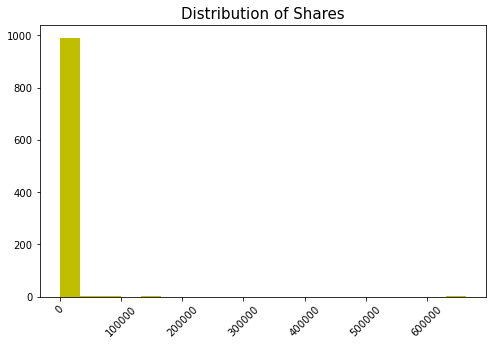

In [11]:
print("Summary Statistics of Shares:")
display(df_news[['shares']].describe())

plt.figure(figsize=(8,5))
plt.hist(df_news['shares'],bins=20, color = 'y')
plt.title("Distribution of Shares",size=15)
plt.xticks(rotation=45)
plt.show()

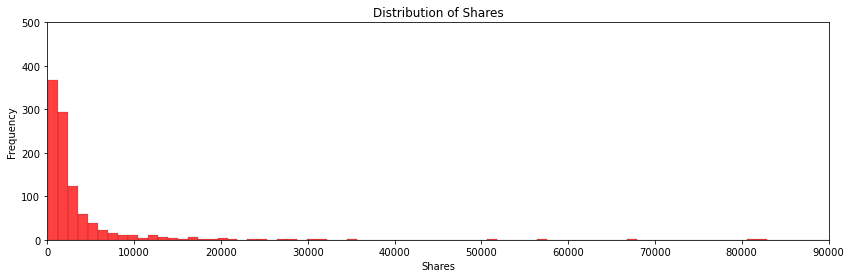

In [12]:
# Distribution of shares
array_shares = df_news['shares']

plt.figure(figsize=(14,4))
sns.histplot(array_shares, color = 'r', bins= 577, cbar= True)
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Shares')
plt.xlim(0, 90000)  # Set the y-axis limit
plt.ylim(0, 500)  # Set the y-axis limit
plt.show()


insights - 
- It's seen that the majority of shares had been from 0 to 5000 and continued at a descending rate upto 20000 shares. Although there had been the visualization of upto 80000 shares and some before that for which we should look over about outliers..

## 4.4.1 Texts Preprocessing and cleaning <a name='tpc441'> </a>

- Here, I have noticed that the texts have been filled with **irrevalant texts and unknown characters**. This could be from the simultaneous modifications of the datasets and etc.

In [13]:
df_news['text'].loc[15]

'No April Foolâ€™s joke: Thereâ€™s a comedy cable network in your pocket, and you\'ll be happy to see it.\n\nFurther blurring the lines between TVs and mobile devices, Comedy Central launched an all-new app Tuesday that will offer a generous helping of its flagship content for free -- and weâ€™re talking full episodes here, not just clips or extras -- on smartphones and tablets.\n\n[seealso slug="ipad-apps-free"]\n\nExisting separate apps for The Daily Show With Jon Stewart and The Colbert Report, which mostly offered snippets and second-screen goodies, have been scuttled effective immediately. And for good reason: The network\'s entire late-night lineup, which includes Chris Hardwickâ€™s @midnight, will be offered on the app for next-day viewing, as will the most recent season of South Park.\n\n"This is TV moving to the tablet, not the website. The idea is bigger than the app -- this is the network," Steve Grimes, SVP of multi-platform programming and strategy, told Mashable during a 

- Going into the details of what I should do incase of **text preprocessing**

Common text preprocessing steps include:

1. **Lowercasing**: Convert all text to lowercase to ensure consistency.

2. **Removing Punctuation**: Remove punctuation marks and special characters.

3. **Removing the special character sequence "â€™" .**: I have seen some special characters all over the place where the removal of them would be a great idea. That's why I should remove all other characters outside ASCII characters.

4. **Tokenization**: Split the text into individual words or tokens.

5. **Stopword Removal**: Remove common stopwords (e.g., "the", "and", "is") that do not carry significant meaning.

6. **Lemmatization or Stemming**: Reduce words to their base or root form. Lemmatization tends to be more accurate but is computationally expensive, while stemming is faster but may produce non-words.

7. **Removing HTML Tags**: If there are any HTML tags in the text, I would remove them.

**Installing nltk related libraries to improve data quality of the texts**

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Text preprocessing

In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

def preprocess_text(text):
    # Lowercase the text as always
    text = text.lower()
    
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub(r"'\s+", " ", text)  # Remove apostrophes followed by whitespace
    text = re.sub(r"\s+'", " ", text)  # Remove apostrophes preceded by whitespace
    
    # Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Joining tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Applying the preprocessing function to a the title and text column
df_news['cleaned_text'] = df_news['text'].apply(preprocess_text)
df_news['cleaned_title'] = df_news['title'].apply(preprocess_text)

In [16]:
df_news['cleaned_text'] .loc[15]

'april fools joke theres comedy cable network pocket youll happy see blurring lines tvs mobile devices comedy central launched allnew app tuesday offer generous helping flagship content free talking full episodes clips extras smartphones tablets seealso slugipadappsfree existing separate apps daily show jon stewart colbert report mostly offered snippets secondscreen goodies scuttled effective immediately good reason networks entire latenight lineup includes chris hardwicks midnight offered app nextday viewing recent season south park tv moving tablet website idea bigger app network steve grimes svp multiplatform programming strategy told mashable demo rollout though much frontfacing content free paytv subscribers log get full range comedy centrals onair programming plus bonuses notably entire season chapelles show content adsupported axe peace corona extra signed initial sponsors though youll appreciate show stars playing immediately theres preroll sponsor ads go commercials otherwise 

In [17]:
df_news['cleaned_title'].loc[15]

'new comedy central app bonanza full episodes free'

## 4.4.2 Date preprocessing
- For the date part, we'll extract features into **weekday**, if it's **weekend or not**, **month**

In [18]:
#for weekday
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_news['weekday'] = df_news['published_date'].apply(lambda x: pd.to_datetime(x).day_name())

#for weekend
weekend_names = ['Friday', 'Saturday']

# Creating a binary indicator for the weekend
df_news['is_weekend'] = df_news['weekday'].apply(lambda x: 1 if x in weekend_names else 0)

# Extracting month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_news['month'] = df_news['published_date'].apply(lambda x: month_names[pd.to_datetime(x).month - 1])

df_news.sample(n=5)

article_id                                              title  \
712     7006226  Watch Coachella Day 2 Live: Lorde, Pharrell, S...   
287     7031016  Tech Stocks Are Getting Hammered, But Don't Fr...   
916     7023721     This Site Predicts Your Success on Kickstarter   
788     7025395  Sean Parker's Latest Startup Aims to Boost Civ...   
81      7032330  Animation Shows Massive Ripple of the Chile Ea...   

                                                  text published_date  \
712  Day one of Coachella has come and gone, paving...     2014-04-12   
287  Technology stocks dropped sharply on Friday, w...     2014-04-04   
916  Millions of people donated to Kickstarter in 2...     2014-04-16   
788  Napster co-founder and former Facebook Preside...     2014-04-14   
81   The magnitude 8.2 earthquake that struck off t...     2014-04-02   

     unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
712            0.760870          3        15           1   
287            0.648402          4         1           0   
916            0.469599         28        11           1   
788            0.433431         12         3           0   
81             0.481233         33         1           0   

     average_token_length  num_keywords  ... global_rate_positive_words  \
712              4.036697            10  ...                   0.073394   
287              4.660714             7  ...                   0.022321   
916              4.363861             7  ...                   0.056931   
788              4.883333            10  ...                   0.030556   
81               4.272189             8  ...                   0.027219   

     global_rate_negative_words  title_subjectivity  title_sentiment_polarity  \
712                    0.036697            0.400000                  -0.40000   
287                    0.013393            0.288889                  -0.15556   
916                    0.023515            0.000000                   0.00000   
788                    0.032407            0.000000                   0.00000   
81                     0.023669            0.000000                   0.00000   

     shares                                       cleaned_text  \
712    1300  day one coachella come gone paving way stellar...   
287    1200  technology stocks dropped sharply friday secto...   
916    6500  millions people donated kickstarter 2013 total...   
788    2000  napster cofounder former facebook president se...   
81      932  magnitude 82 earthquake struck northwest coast...   

                                         cleaned_title    weekday  is_weekend  \
712  watch coachella day 2 live lorde pharrell skri...   Saturday           1   
287            tech stocks getting hammered dont freak     Friday           1   
916                  site predicts success kickstarter  Wednesday           0   
788  sean parkers latest startup aims boost civic i...     Monday           0   
81   animation shows massive ripple chile earthquak...  Wednesday           0   

     month  
712  April  
287  April  
916  April  
788  April  
81   April  

[5 rows x 27 columns]

- I have also noticed a weird category in `data_channel` column containing **00000**

In [19]:
df_news['data_channel'].value_counts()

data_channel
00000            350
Tech             196
Entertainment    185
Business         164
Social Media      55
Lifestyle         50
Name: count, dtype: int64

In [20]:

color_scale = px.colors.sequential.Cividis

fig = go.Figure(
    [go.Bar(
        x=df_news["data_channel"].value_counts().index, 
        y=df_news["shares"].value_counts().values,
        marker_color=color_scale 
    )]
)

fig.update_layout(
    title={"text": 'Distribution of articles Data channel-wise', 'y': 0.9, 'x': 0.5,},
    xaxis_title="Data channel name",
    yaxis_title="Number of articles"
)

fig.update_layout(width=800, height=700)
fig.show()



Solutions:

  - I should replace the `00000` with `Others`

In [21]:
df_news['cleaned_data_channel'] = df_news['data_channel'].replace('00000', 'Others')
df_news['cleaned_data_channel'].value_counts()


cleaned_data_channel
Others           350
Tech             196
Entertainment    185
Business         164
Social Media      55
Lifestyle         50
Name: count, dtype: int64

## 4.5 Handling Categorical Data <a name = 'HCD_4.5' ></a>

**One-hot encoding**

In [22]:
# Applying one-hot encoding to the 'data_channel' column
enc_cleaned_data_channel = df_news[['cleaned_data_channel']]
enc_cleaned_data_channel = pd.get_dummies(enc_cleaned_data_channel, prefix= 'Channel', drop_first= True)
enc_cleaned_data_channel = enc_cleaned_data_channel.astype(int)
enc_cleaned_data_channel.head()

Channel_Entertainment  Channel_Lifestyle  Channel_Others  \
0                      0                  0               0   
1                      0                  0               0   
2                      0                  0               0   
3                      0                  0               0   
4                      0                  0               1   

   Channel_Social Media  Channel_Tech  
0                     0             0  
1                     0             1  
2                     0             1  
3                     0             1  
4                     0             0

In [23]:
#concatenating one-hot encoded data channel with main dataframe
df_news = pd.concat([df_news,enc_cleaned_data_channel], axis = 1)
df_news.sample(5)

article_id                                              title  \
636     7006964  Al Jazeera America Announces First Layoffs Sin...   
992     7023018   Firefighters Battle Boredom With Hose Hovercraft   
177     7030278  David Letterman's Top 10 Late Night Television...   
59      6802220          Grow the Bushy Beard You've Always Wanted   
347     7030359  Child's Portrait Puts a Face on Drone Strikes ...   

                                                  text published_date  \
636  Al Jazeera America has initiated its first rou...     2014-04-11   
992  The typical day of a firefighter includes the ...     2014-04-17   
177  David Letterman announced Thursday he would re...     2014-04-03   
59   ThinkGeek, the home of all things geeky that y...     2014-04-01   
347  A drone pilot can sit in a room thousands of m...     2014-04-07   

     unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
636            0.439453          8         1           0   
992            0.656977          2         0           1   
177            0.371487         12        16           3   
59             0.516667         14        12           0   
347            0.614841          6         1           0   

     average_token_length  num_keywords  ...  \
636              5.248047             6  ...   
992              4.242938             6  ...   
177              4.578508             6  ...   
59               4.729282             6  ...   
347              4.959044             6  ...   

                                         cleaned_title   weekday  is_weekend  \
636  al jazeera america announces first layoffs sin...    Friday           1   
992        firefighters battle boredom hose hovercraft  Thursday           0   
177  david lettermans top 10 late night television ...  Thursday           0   
59                grow bushy beard youve always wanted   Tuesday           0   
347   childs portrait puts face drone strikes pakistan    Monday           0   

     month  cleaned_data_channel  Channel_Entertainment  Channel_Lifestyle  \
636  April                Others                      0                  0   
992  April         Entertainment                      1                  0   
177  April         Entertainment                      1                  0   
59   April                Others                      0                  0   
347  April         Entertainment                      1                  0   

     Channel_Others  Channel_Social Media  Channel_Tech  
636               1                     0             0  
992               0                     0             0  
177               0                     0             0  
59                1                     0             0  
347               0                     0             0  

[5 rows x 33 columns]

In [24]:
df_news.columns

Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'cleaned_text', 'cleaned_title',
       'weekday', 'is_weekend', 'month', 'cleaned_data_channel',
       'Channel_Entertainment', 'Channel_Lifestyle', 'Channel_Others',
       'Channel_Social Media', 'Channel_Tech'],
      dtype='object')

In [25]:
df_news_final = df_news.drop(columns = ['article_id', 'title', 'text', 'published_date','data_channel', ], axis=1)
desired_columns = ['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month', 'cleaned_data_channel','Channel_Entertainment', 'Channel_Lifestyle',
                   'Channel_Others', 'Channel_Social Media', 'Channel_Tech', 'unique_tokens_rate',
                   'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
                   'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key',
                   'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity',
                   'global_rate_positive_words', 'global_rate_negative_words',
                   'title_subjectivity', 'title_sentiment_polarity', 'shares']


df_news_final = df_news[desired_columns].copy()

df_news_final.head()

cleaned_title  \
0                            time youtube competitor   
1  ultimate roundup 2014s biggest april fools day...   
2       selfie one garish jacket red sox white house   
3         african telecom proposes diverse emoticons   
4  google launch improved android camera app repo...   

                                        cleaned_text  weekday  is_weekend  \
0  reported last week yahoo getting online video ...   Monday           0   
1  april fools marks day pranking goes corporate ...  Tuesday           0   
2  2013 world series champion boston red sox visi...  Tuesday           0   
3  less week apple pledged make emoticons raciall...  Tuesday           0   
4  android users may soon see series new features...  Tuesday           0   

   month cleaned_data_channel  Channel_Entertainment  Channel_Lifestyle  \
0  March             Business                      0                  0   
1  April                 Tech                      0                  0   
2  April                 Tech                      0                  0   
3  April                 Tech                      0                  0   
4  April               Others                      0                  0   

   Channel_Others  Channel_Social Media  ...  max_avg_key  avg_avg_key  \
0               0                     0  ...     4817.692     3370.415   
1               0                     0  ...     3581.094     2556.367   
2               0                     0  ...     3852.800     3018.167   
3               0                     0  ...     3581.094     1871.403   
4               1                     0  ...     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  
0                      0.25    1600  
1                      0.00    1500  
2                      0.00    1400  
3                      0.00    1300  
4                      0.00    3000  

[5 rows x 28 columns]

## Univariate Analysis
 1. Unique Tokens Rate:

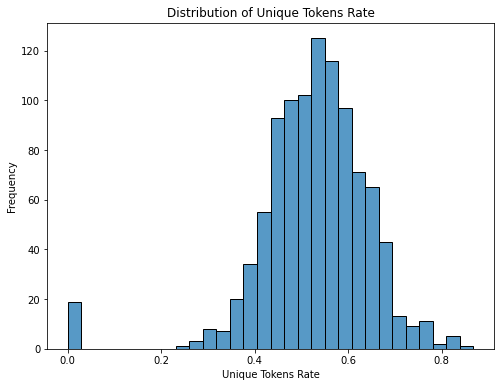

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df_news['unique_tokens_rate'], bins=30)
plt.xlabel('Unique Tokens Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Tokens Rate')
plt.show()


2. Number of Links, Number of Images, Number of Videos

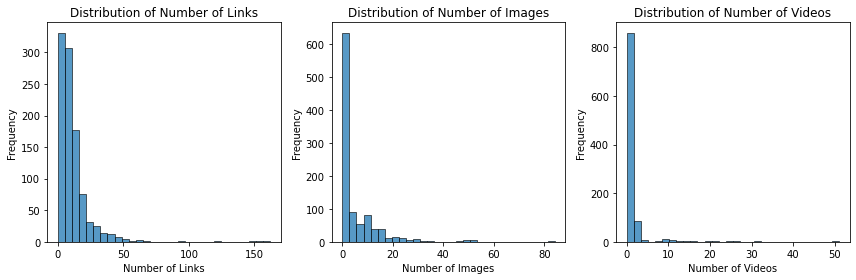

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(df_news['num_hrefs'], bins=30)
plt.xlabel('Number of Links')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Links')

plt.subplot(132)
sns.histplot(df_news['num_imgs'], bins=30)
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Images')

plt.subplot(133)
sns.histplot(df_news['num_videos'], bins=30)
plt.xlabel('Number of Videos')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Videos')

plt.tight_layout()
plt.show()


3. Average token length

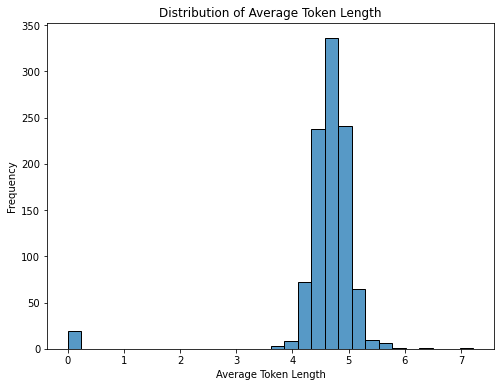

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df_news['average_token_length'], bins=30)
plt.xlabel('Average Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Token Length')
plt.show()


4. Number of keywords

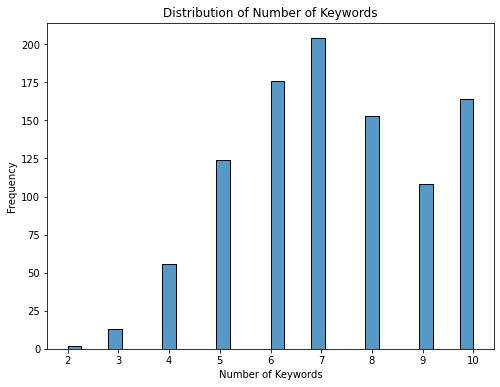

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df_news['num_keywords'], bins=30)
plt.xlabel('Number of Keywords')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Keywords')
plt.show()

5. MIn, max and avg keys' distribution

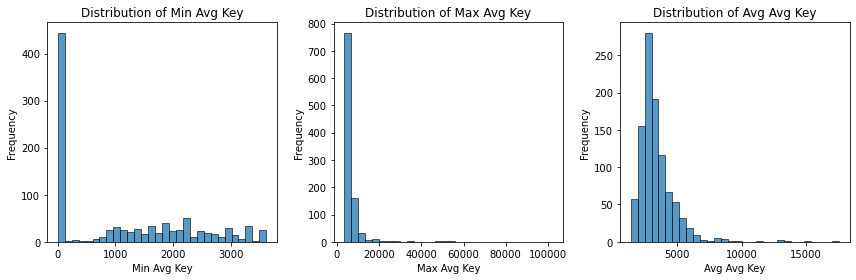

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(df_news['min_avg_key'], bins=30,)
plt.xlabel('Min Avg Key')
plt.ylabel('Frequency')
plt.title('Distribution of Min Avg Key')

plt.subplot(132)
sns.histplot(df_news['max_avg_key'], bins=30, )
plt.xlabel('Max Avg Key')
plt.ylabel('Frequency')
plt.title('Distribution of Max Avg Key')

plt.subplot(133)
sns.histplot(df_news['avg_avg_key'], bins=30,)
plt.xlabel('Avg Avg Key')
plt.ylabel('Frequency')
plt.title('Distribution of Avg Avg Key')

plt.tight_layout()
plt.show()


6. Data channel distributions by shares

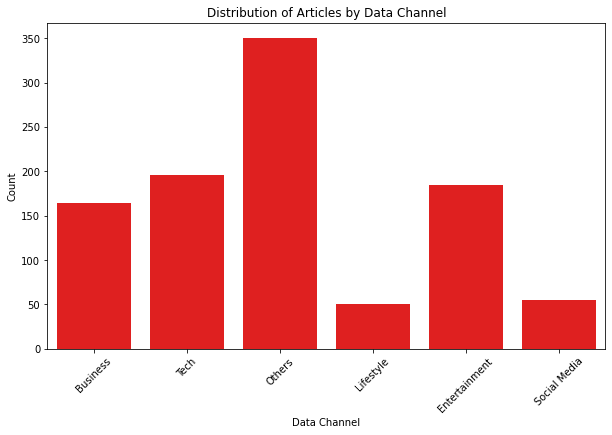

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_news, x='cleaned_data_channel', color = 'r')
plt.xlabel('Data Channel')
plt.ylabel('Count')
plt.title('Distribution of Articles by Data Channel')
plt.xticks(rotation=45)
plt.show()


7. other columns vs shares

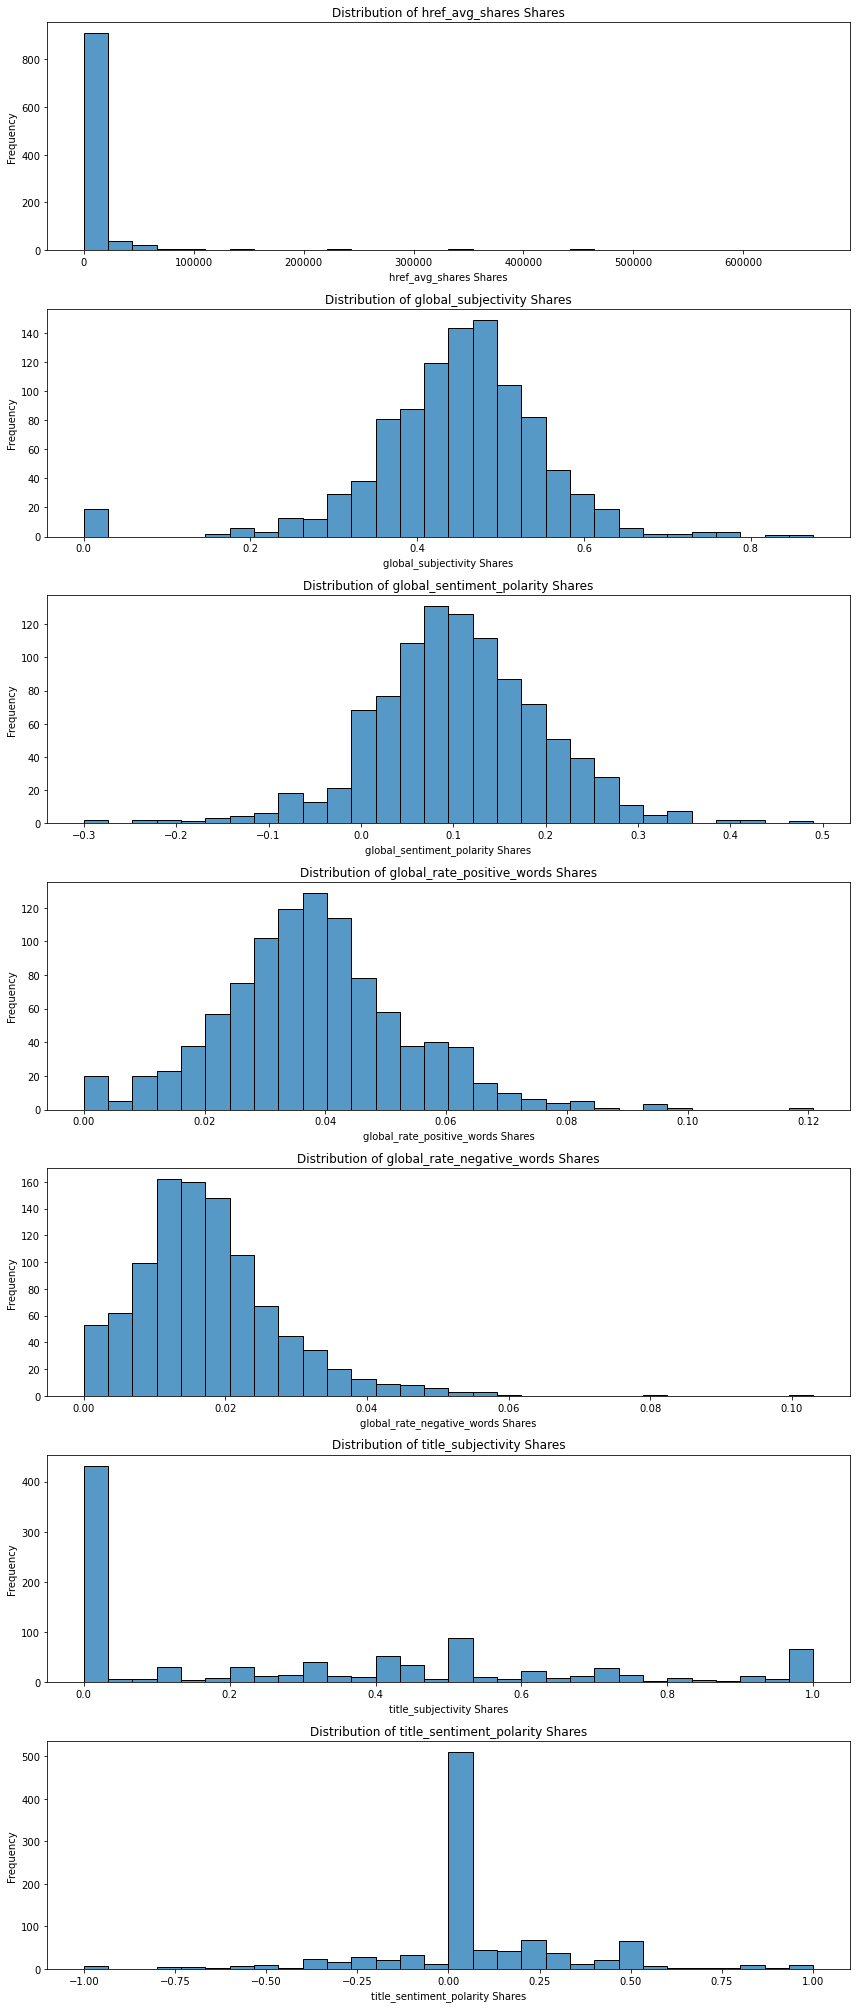

In [32]:
columns_to_plot = ['href_avg_shares', 'global_subjectivity',                   'global_sentiment_polarity', 'global_rate_positive_words',
                   'global_rate_negative_words', 'title_subjectivity',
                   'title_sentiment_polarity']


fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, 4 * len(columns_to_plot)))

for i, column_name in enumerate(columns_to_plot):
    sns.histplot(df_news[column_name], bins=30, ax=axes[i])
    axes[i].set_xlabel(f'{column_name} Shares')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column_name} Shares')

plt.tight_layout()
plt.show()


## Multi-variate analysis

1. **Correlation analysis**

In [33]:
df_news_final.head(1)

cleaned_title                                       cleaned_text  \
0  time youtube competitor  reported last week yahoo getting online video ...   

  weekday  is_weekend  month cleaned_data_channel  Channel_Entertainment  \
0  Monday           0  March             Business                      0   

   Channel_Lifestyle  Channel_Others  Channel_Social Media  ...  max_avg_key  \
0                  0               0                     0  ...     4817.692   

   avg_avg_key  href_avg_shares  global_subjectivity  \
0     3370.415         1833.333             0.403762   

   global_sentiment_polarity  global_rate_positive_words  \
0                   0.038762                    0.036735   

   global_rate_negative_words  title_subjectivity  title_sentiment_polarity  \
0                     0.02449                0.25                      0.25   

   shares  
0    1600  

[1 rows x 28 columns]

In [34]:
df_news['month'].value_counts()

month
April    999
March      1
Name: count, dtype: int64

In [35]:
'''from sklearn.preprocessing import LabelEncoder

#  label encoders for 'month' and 'weekday'
month_encoder = LabelEncoder()
weekday_encoder = LabelEncoder()

# Fit and transform the 'month' and 'weekday' columns
df_news_final['month number'] = month_encoder.fit_transform(df_news_final['month'])
df_news_final['weekday number'] = weekday_encoder.fit_transform(df_news_final['weekday'])
'''

"from sklearn.preprocessing import LabelEncoder\n\n#  label encoders for 'month' and 'weekday'\nmonth_encoder = LabelEncoder()\nweekday_encoder = LabelEncoder()\n\n# Fit and transform the 'month' and 'weekday' columns\ndf_news_final['month number'] = month_encoder.fit_transform(df_news_final['month'])\ndf_news_final['weekday number'] = weekday_encoder.fit_transform(df_news_final['weekday'])\n"

In [36]:
df_news_final.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

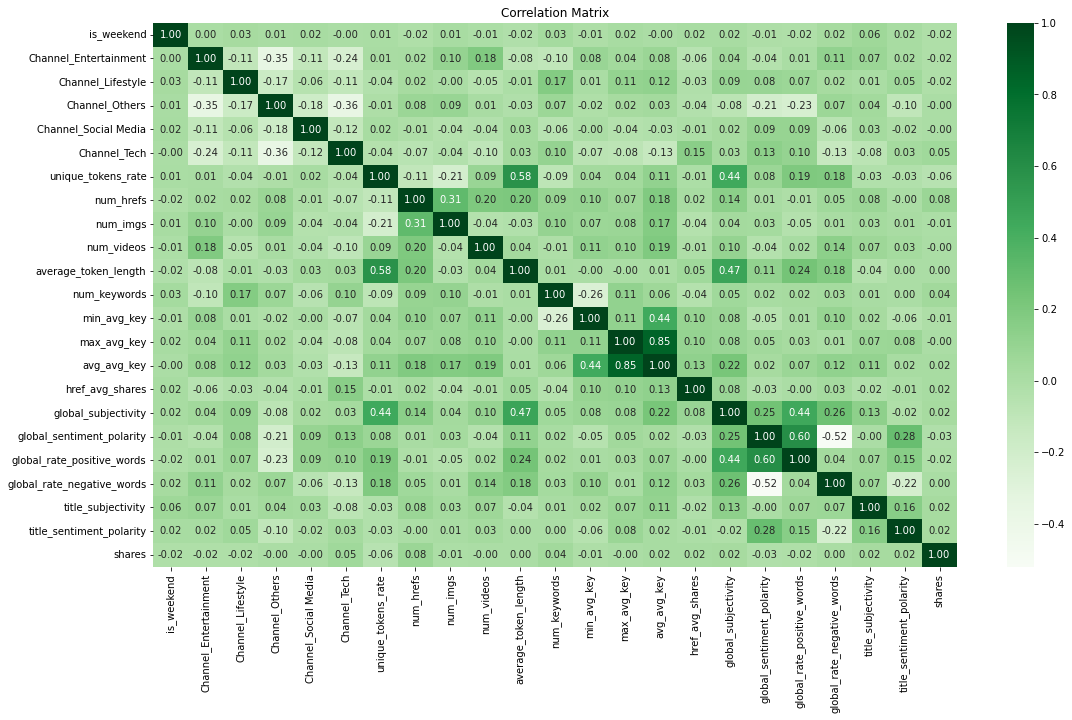

In [37]:
num_news = df_news_final[['is_weekend',
       'Channel_Entertainment', 'Channel_Lifestyle', 'Channel_Others',
       'Channel_Social Media', 'Channel_Tech', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key',
       'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'title_subjectivity', 'title_sentiment_polarity', 'shares']]

correlation_matrix = num_news.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


2. **Box plots for categorical variables**


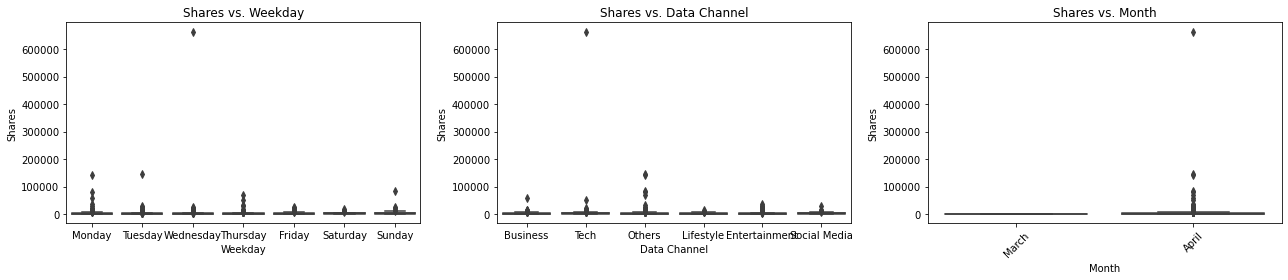

In [38]:
plt.figure(figsize=(18, 4)) 

# Box plot for 'weekday'
plt.subplot(131)
sns.boxplot(x='weekday', y='shares', data=df_news, orient='v')  
plt.xlabel('Weekday')
plt.ylabel('Shares')
plt.title('Shares vs. Weekday')

# Box plot for 'cleaned_data_channel'
plt.subplot(132)
sns.boxplot(x='cleaned_data_channel', y='shares', data=df_news, orient='v')  
plt.xlabel('Data Channel')
plt.ylabel('Shares')
plt.title('Shares vs. Data Channel')

# Box plot for 'month'
plt.subplot(133)
sns.boxplot(x='month', y='shares', data=df_news, orient='v')  
plt.xlabel('Month')
plt.ylabel('Shares')
plt.title('Shares vs. Month')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Pair plots for numerical features

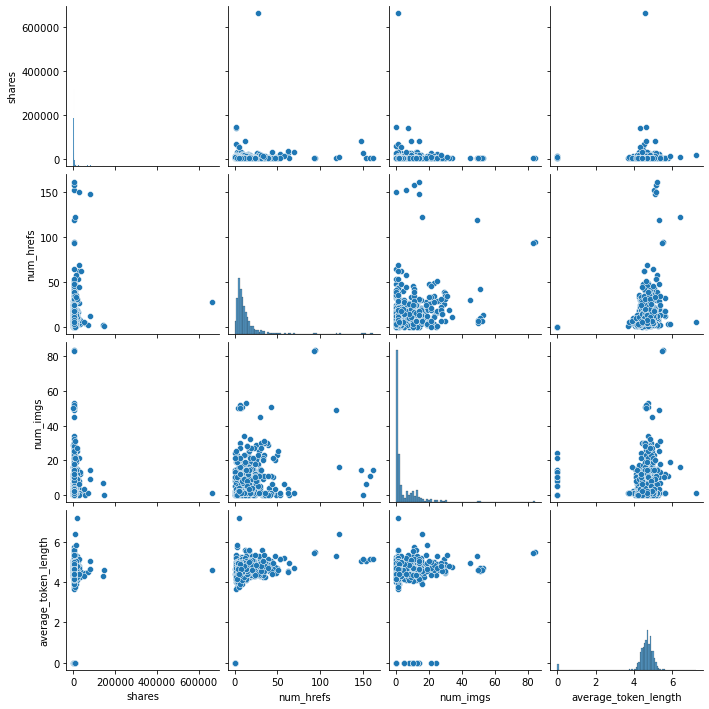

In [39]:
# Pair plots for selected numerical features
sns.pairplot(df_news[['shares', 'num_hrefs', 'num_imgs', 'average_token_length']])
plt.show()



In [40]:
df_news_final.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [41]:
dc =   ['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month', 'cleaned_data_channel',
       'Channel_Entertainment', 'Channel_Lifestyle', 'Channel_Others',
       'Channel_Social Media', 'Channel_Tech', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key',
       'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'title_subjectivity', 'title_sentiment_polarity', 'shares',
       ]

df_news_final = df_news_final[dc].copy()

df_news_final.head()



cleaned_title  \
0                            time youtube competitor   
1  ultimate roundup 2014s biggest april fools day...   
2       selfie one garish jacket red sox white house   
3         african telecom proposes diverse emoticons   
4  google launch improved android camera app repo...   

                                        cleaned_text  weekday  is_weekend  \
0  reported last week yahoo getting online video ...   Monday           0   
1  april fools marks day pranking goes corporate ...  Tuesday           0   
2  2013 world series champion boston red sox visi...  Tuesday           0   
3  less week apple pledged make emoticons raciall...  Tuesday           0   
4  android users may soon see series new features...  Tuesday           0   

   month cleaned_data_channel  Channel_Entertainment  Channel_Lifestyle  \
0  March             Business                      0                  0   
1  April                 Tech                      0                  0   
2  April                 Tech                      0                  0   
3  April                 Tech                      0                  0   
4  April               Others                      0                  0   

   Channel_Others  Channel_Social Media  ...  max_avg_key  avg_avg_key  \
0               0                     0  ...     4817.692     3370.415   
1               0                     0  ...     3581.094     2556.367   
2               0                     0  ...     3852.800     3018.167   
3               0                     0  ...     3581.094     1871.403   
4               1                     0  ...     8453.451     5155.323   

   href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0         1833.333             0.403762                   0.038762   
1         8500.000             0.410707                   0.180934   
2         2076.333             0.397545                   0.044864   
3         2200.000             0.491578                   0.157620   
4          805.000             0.628535                   0.078497   

   global_rate_positive_words  global_rate_negative_words  title_subjectivity  \
0                    0.036735                    0.024490                0.25   
1                    0.044944                    0.003745                0.00   
2                    0.035294                    0.019608                0.00   
3                    0.047809                    0.011952                0.00   
4                    0.053763                    0.034946                0.00   

   title_sentiment_polarity  shares  
0                      0.25    1600  
1                      0.00    1500  
2                      0.00    1400  
3                      0.00    1300  
4                      0.00    3000  

[5 rows x 28 columns]

df_news_final.sample(5)

**A duplicate article_id was found that had two articles' info written and for that we should remove the ones that had less article shares**

In [42]:

df_news['article_id_count'] = df_news.groupby('article_id')['article_id'].transform('count')

duplicate_articles = df_news[df_news['article_id_count'] > 1]

duplicate_articles

article_id                                              title  \
510     7028680  Dove's Beauty Patch Experiment Wants You to Em...   
511     7028680  Dropbox Unveils Project Harmony, Mailbox for A...   

                                                  text published_date  \
510  On the heels of last year's "Beauty Sketches" ...     2014-04-09   
511  Dropbox on Wednesday unveiled a suite of fresh...     2014-04-09   

     unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
510            0.418367         30         4           1   
511            0.316504         42        11           0   

     average_token_length  num_keywords  ...    weekday  is_weekend  month  \
510              4.379342             9  ...  Wednesday           0  April   
511              4.540550             7  ...  Wednesday           0  April   

     cleaned_data_channel  Channel_Entertainment  Channel_Lifestyle  \
510             Lifestyle                      0                  1   
511              Business                      0                  0   

     Channel_Others  Channel_Social Media  Channel_Tech  article_id_count  
510               0                     0             0                 2  
511               0                     0             0                 2  

[2 rows x 34 columns]

**I dropped the row of 511 containing the same article_id from 510 with less shares**

In [43]:
df_news_final = df_news.drop(511, axis=0)
df_news_final[510:513]

article_id                                              title  \
510     7028680  Dove's Beauty Patch Experiment Wants You to Em...   
512     7028664  Facebook's Not Messing Around: Messenger Will ...   
513     7028589  Facebook Overhauls and Limits Those Despised R...   

                                                  text published_date  \
510  On the heels of last year's "Beauty Sketches" ...     2014-04-09   
512  When Facebook acquired standalone messaging ap...     2014-04-09   
513  When Facebook rolled out its last desktop rede...     2014-04-09   

     unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
510            0.418367         30         4           1   
512            0.442667         38        30           1   
513            0.608108          6         0           0   

     average_token_length  num_keywords  ...    weekday  is_weekend  month  \
510              4.379342             9  ...  Wednesday           0  April   
512              4.902760             7  ...  Wednesday           0  April   
513              4.693694             6  ...  Wednesday           0  April   

     cleaned_data_channel  Channel_Entertainment  Channel_Lifestyle  \
510             Lifestyle                      0                  1   
512                Others                      0                  0   
513                  Tech                      0                  0   

     Channel_Others  Channel_Social Media  Channel_Tech  article_id_count  
510               0                     0             0                 2  
512               1                     0             0                 1  
513               0                     0             1                 1  

[3 rows x 34 columns]

In [44]:
df_news_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1002
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  999 non-null    int64         
 1   title                       999 non-null    object        
 2   text                        999 non-null    object        
 3   published_date              999 non-null    datetime64[ns]
 4   unique_tokens_rate          999 non-null    float64       
 5   num_hrefs                   999 non-null    int64         
 6   num_imgs                    999 non-null    int64         
 7   num_videos                  999 non-null    int64         
 8   average_token_length        999 non-null    float64       
 9   num_keywords                999 non-null    int64         
 10  data_channel                999 non-null    object        
 11  min_avg_key                 999 non-null    float64       
 12

In [45]:
df_news_final.columns


Index(['article_id', 'title', 'text', 'published_date', 'unique_tokens_rate',
       'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'cleaned_text', 'cleaned_title',
       'weekday', 'is_weekend', 'month', 'cleaned_data_channel',
       'Channel_Entertainment', 'Channel_Lifestyle', 'Channel_Others',
       'Channel_Social Media', 'Channel_Tech', 'article_id_count'],
      dtype='object')

In [46]:
df_news_final = df_news_final.drop(columns = ['article_id', 'title', 'text', 'published_date','article_id_count'])

In [57]:

desired_columns = ['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month', 'cleaned_data_channel',
                   'Channel_Entertainment', 'Channel_Lifestyle', 'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
                   'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
                    'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
                   'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'title_subjectivity',
                   'title_sentiment_polarity', 'shares']

df_news_final = df_news_final[desired_columns]


In [58]:
df_news_final

cleaned_title  \
0                               time youtube competitor   
1     ultimate roundup 2014s biggest april fools day...   
2          selfie one garish jacket red sox white house   
3            african telecom proposes diverse emoticons   
4     google launch improved android camera app repo...   
...                                                 ...   
998             make caesar salad 8 super specific apps   
999            taylor swift surprised fan bridal shower   
1000  amazing spiderman 2 hosts first google hangout...   
1001    2 animators independently recreated pixar magic   
1002  twilight anymore robert pattinson battles lawl...   

                                           cleaned_text   weekday  is_weekend  \
0     reported last week yahoo getting online video ...    Monday           0   
1     april fools marks day pranking goes corporate ...   Tuesday           0   
2     2013 world series champion boston red sox visi...   Tuesday           0   
3     less week apple pledged make emoticons raciall...   Tuesday           0   
4     android users may soon see series new features...   Tuesday           0   
...                                                 ...       ...         ...   
998   lets cut chase apps lot bells whistles theres ...  Thursday           0   
999   taylor swift bridal showers made pastels baked...  Thursday           0   
1000  weve seen big movies throw big google hangouts...  Thursday           0   
1001  pixar art directors robert kondo dice tsutsumi...  Thursday           0   
1002  held gunpoint brother abandoned roadside austr...  Thursday           0   

      month cleaned_data_channel  Channel_Entertainment  Channel_Lifestyle  \
0     March             Business                      0                  0   
1     April                 Tech                      0                  0   
2     April                 Tech                      0                  0   
3     April                 Tech                      0                  0   
4     April               Others                      0                  0   
...     ...                  ...                    ...                ...   
998   April             Business                      0                  0   
999   April                 Tech                      0                  0   
1000  April        Entertainment                      1                  0   
1001  April             Business                      0                  0   
1002  April             Business                      0                  0   

      Channel_Others  Channel_Social Media  ...  max_avg_key  avg_avg_key  \
0                  0                     0  ...     4817.692     3370.415   
1                  0                     0  ...     3581.094     2556.367   
2                  0                     0  ...     3852.800     3018.167   
3                  0                     0  ...     3581.094     1871.403   
4                  1                     0  ...     8453.451     5155.323   
...              ...                   ...  ...          ...          ...   
998                0                     0  ...     5709.823     4020.608   
999                0                     0  ...     4352.491     2358.572   
1000               0                     0  ...     6060.771     3296.052   
1001               0                     0  ...     4763.083     2709.129   
1002               0                     0  ...     3610.125     2717.930   

      href_avg_shares  global_subjectivity  global_sentiment_polarity  \
0            1833.333             0.403762                   0.038762   
1            8500.000             0.410707                   0.180934   
2            2076.333             0.397545                   0.044864   
3            2200.000             0.491578                   0.157620   
4             805.000             0.628535                   0.078497   
...               ...                  ...                  

In [60]:
#finally saving it to new csv file
df_news_final.to_csv("data/news_share_data_selected.csv",index=False)